In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv("Customer Data.csv",header=0)

In [3]:
customer_df.head()

,Customer ID,Mail Deliverable,Lifetime Recency,Lifetime Frequency,Lifetime Monetary,Closest store distance
0,18089141,Y,12,1,368.84,161.0
1,4482047,Y,15,2,118.90,8.0
2,18201629,Y,4,1,99.90,86.0
3,18116939,Y,11,1,29.92,80.0
4,9125409,Y,4,21,1785.23,10.0


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer ID             200000 non-null  int64  
 1   Mail Deliverable        200000 non-null  object 
 2   Lifetime Recency        200000 non-null  int64  
 3   Lifetime Frequency      200000 non-null  int64  
 4   Lifetime Monetary       200000 non-null  float64
 5   Closest store distance  197159 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.2+ MB


In [5]:
len(customer_df['Customer ID'].unique())

200000

In [6]:
# percent missing values in customer data
round(100*(customer_df.isnull().sum())/len(customer_df), 2)

Customer ID               0.00
Mail Deliverable          0.00
Lifetime Recency          0.00
Lifetime Frequency        0.00
Lifetime Monetary         0.00
Closest store distance    1.42
dtype: float64

In [7]:
missing_count = customer_df['Closest store distance'].isnull().sum()
missing_count

2841

In [8]:
customer_df['Closest store distance'].describe()

count    197159.000000
mean         43.918507
std          50.164970
min           0.000000
25%          10.000000
50%          22.000000
75%          62.000000
max         299.000000
Name: Closest store distance, dtype: float64

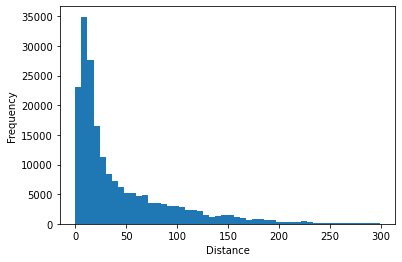

In [9]:
plt.hist(customer_df['Closest store distance'], bins=50)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

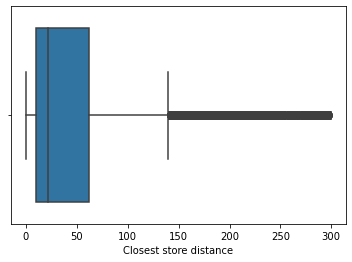

In [10]:
sns.boxplot(x=customer_df["Closest store distance"])
plt.show()

In [11]:
# impute missing distance enteries with mean distance
mean_distance = customer_df['Closest store distance'].mean()
customer_df['Closest store distance'] = customer_df['Closest store distance'].fillna(mean_distance)

In [12]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer ID             200000 non-null  int64  
 1   Mail Deliverable        200000 non-null  object 
 2   Lifetime Recency        200000 non-null  int64  
 3   Lifetime Frequency      200000 non-null  int64  
 4   Lifetime Monetary       200000 non-null  float64
 5   Closest store distance  200000 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.2+ MB


In [13]:
purchase_df = pd.read_csv("Purchase Data.csv",header = 0)

C:\Users\p.neeraj.mendhekar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508658 entries, 0 to 508657
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Customer ID  508658 non-null  int64  
 1   Date         508658 non-null  object 
 2   Product      508658 non-null  object 
 3   Units        508658 non-null  int64  
 4   Amount       508655 non-null  float64
 5   Cost         508658 non-null  float64
 6   Channel      508658 non-null  object 
 7   Store        508658 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 31.0+ MB


In [15]:
purchase_df.head()

,Customer ID,Date,Product,Units,Amount,Cost,Channel,Store
0,1806560,19/09/2019,APPAREL,1,29.97,20.00,Internet,~
1,1806560,19/09/2019,APPAREL,1,29.97,38.00,Internet,~
2,1806560,19/09/2019,APPAREL,1,29.98,27.25,Internet,~
3,1806560,19/09/2019,APPAREL,1,24.97,15.00,Internet,~
4,1806560,19/09/2019,APPAREL,1,39.98,19.00,Internet,~


In [16]:
purchase_df.shape

(508658, 8)

In [17]:
len(purchase_df['Customer ID'].unique())

86665

In [18]:
purchase_df['Channel'].unique()

array(['Internet', 'POS Sales'], dtype=object)

In [19]:
purchase_df['Product'].unique()

array(['APPAREL', 'ACCESSORIES', 'NOVELTY', 'PERSONAL CARE', 'JEWELRY',
       'FOOTWEAR', 'BEAUTY', 'BATH & BODY'], dtype=object)

In [20]:
purchase_df['Store'].unique()

array(['~', '37', '17', '15', '74', '10', '33', '23', '20', '45', '55',
       '22', '24', '26', '14', '13', '40', '36', '62', '67', '53', '56',
       '81', '52', '6', '1', '28', '51', '31', '69', '12', '72', '48',
       '35', '32', '41', '19', '58', '38', '77', '7', '57', '80', '49',
       '29', '50', '3', '47', '34', '54', '68', '76', '21', '60', '27',
       '65', '43', '70', '5', '9', '46', '39', '16', '61', '11', '59',
       '83', '63', '25', '71', '75', '2', '30', '44', '66', '73', '64',
       '18', '82', '42', '79', 19, 5, 39, 7, 60, 37, 50, 74, 14, 65, 75,
       38, 18, 9, 80, 42, 70, 31, 66, 67, 11, 63, 32, 40, 54, 46, 71, 10,
       61, 6, 16, 25, 59, 43, 13, 68, 62, 33, 27, 81, 1, 55, 82, 44, 48,
       26, 52, 72, 51, 28, 69, 15, 64, 22, 30, 56, 49, 58, 24, 73, 17, 23,
       29, 3, 35, 20, 76, 12, 45, 47, 21, 83, 36, 79, 41, 53, 34, 2, 57,
       77], dtype=object)

In [21]:
purchase_df["Store"] = purchase_df["Store"].replace("~", "999")

In [22]:
purchase_df['Store'].unique()

array(['999', '37', '17', '15', '74', '10', '33', '23', '20', '45', '55',
       '22', '24', '26', '14', '13', '40', '36', '62', '67', '53', '56',
       '81', '52', '6', '1', '28', '51', '31', '69', '12', '72', '48',
       '35', '32', '41', '19', '58', '38', '77', '7', '57', '80', '49',
       '29', '50', '3', '47', '34', '54', '68', '76', '21', '60', '27',
       '65', '43', '70', '5', '9', '46', '39', '16', '61', '11', '59',
       '83', '63', '25', '71', '75', '2', '30', '44', '66', '73', '64',
       '18', '82', '42', '79', 19, 5, 39, 7, 60, 37, 50, 74, 14, 65, 75,
       38, 18, 9, 80, 42, 70, 31, 66, 67, 11, 63, 32, 40, 54, 46, 71, 10,
       61, 6, 16, 25, 59, 43, 13, 68, 62, 33, 27, 81, 1, 55, 82, 44, 48,
       26, 52, 72, 51, 28, 69, 15, 64, 22, 30, 56, 49, 58, 24, 73, 17, 23,
       29, 3, 35, 20, 76, 12, 45, 47, 21, 83, 36, 79, 41, 53, 34, 2, 57,
       77], dtype=object)

In [23]:
purchase_df['Store'] = purchase_df['Store'].astype(int)

In [24]:
def find_missing_store_number(unique_arr):
    n = len(unique_arr) + 1
    expected_sum = (n * (n + 1)) // 2
    actual_sum = sum(unique_arr)
    missing_number = expected_sum - actual_sum
    return missing_number

In [25]:
def find_missing_numbers(unique_arr):
    min_num = min(unique_arr)
    max_num = max(unique_arr)
    new_arr = [0] * (max_num - min_num + 1)
    for num in arr:
        new_arr[num - min_num] = 1
    missing_numbers = []
    for i in range(len(new_arr)):
        if new_arr[i] == 0:
            missing_numbers.append(i + min_num)
    return missing_numbers


In [26]:
import numpy as np
arr = purchase_df.loc[purchase_df["Store"] != 999, "Store"].values.astype(np.int32)
unique_arr = np.unique(arr)
missing_numbers = find_missing_numbers(unique_arr)
print(missing_numbers)


[4, 8, 78]


In [27]:
#check for missing values in purchase data
round(100*(purchase_df.isnull().sum())/len(purchase_df), 2)

Customer ID    0.0
Date           0.0
Product        0.0
Units          0.0
Amount         0.0
Cost           0.0
Channel        0.0
Store          0.0
dtype: float64

### EDA

In [28]:
# merge customer data and purchase data
# merge the two data frames on the 'Customer ID' column
merged_df = pd.merge(customer_df, purchase_df, on='Customer ID', how='inner')

# drop duplicate rows if any
merged_df.drop_duplicates()

,Customer ID,Mail Deliverable,Lifetime Recency,Lifetime Frequency,Lifetime Monetary,Closest store distance,Date,Product,Units,Amount,Cost,Channel,Store
0,4482047,Y,15,2,118.90,8.0,07/06/2019,APPAREL,1,108.95,23.00,Internet,999
1,6564872,Y,4,6,1785.20,13.0,13/12/2019,APPAREL,1,69.95,16.31,Internet,999
2,7004515,Y,11,23,2068.93,23.0,21/11/2019,APPAREL,1,119.95,39.75,Internet,999
3,7004515,Y,11,23,2068.93,23.0,20/07/2019,APPAREL,1,59.95,14.75,Internet,999
4,6429944,Y,11,8,2813.77,9.0,12/11/2019,APPAREL,1,79.95,15.76,Internet,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508653,2930907,Y,18,1,99.90,175.0,20/04/2019,APPAREL,1,76.46,13.80,Internet,999
508654,18077839,Y,13,2,229.86,24.0,31/08/2019,APPAREL,1,39.99,27.25,Internet,999
508655,18077839,Y,13,2,229.86,24.0,31/08/2019,APPAREL,1,49.99,21.00,Internet,999
508656,18077839,Y,13,2,229.86,24.0,31/08/2019,APPAREL,1,59.99,20.16,Internet,999


In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508658 entries, 0 to 508657
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer ID             508658 non-null  int64  
 1   Mail Deliverable        508658 non-null  object 
 2   Lifetime Recency        508658 non-null  int64  
 3   Lifetime Frequency      508658 non-null  int64  
 4   Lifetime Monetary       508658 non-null  float64
 5   Closest store distance  508658 non-null  float64
 6   Date                    508658 non-null  object 
 7   Product                 508658 non-null  object 
 8   Units                   508658 non-null  int64  
 9   Amount                  508655 non-null  float64
 10  Cost                    508658 non-null  float64
 11  Channel                 508658 non-null  object 
 12  Store                   508658 non-null  int32  
dtypes: float64(4), int32(1), int64(4), object(4)
memory usage: 52.4+ MB


In [30]:
#convert date to proper datatype
import datetime as dt
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [31]:
merged_df['Mail Deliverable'].unique()

array(['Y', 'N'], dtype=object)

In [32]:
merged_df["Mail Deliverable"] = merged_df["Mail Deliverable"].replace("Y", "1")
merged_df["Mail Deliverable"] = merged_df["Mail Deliverable"].replace("N", "0")

In [33]:
merged_df['Mail Deliverable'].unique()

array(['1', '0'], dtype=object)

In [34]:
merged_df['Mail Deliverable'] = merged_df['Mail Deliverable'].astype(int)

In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508658 entries, 0 to 508657
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Customer ID             508658 non-null  int64         
 1   Mail Deliverable        508658 non-null  int32         
 2   Lifetime Recency        508658 non-null  int64         
 3   Lifetime Frequency      508658 non-null  int64         
 4   Lifetime Monetary       508658 non-null  float64       
 5   Closest store distance  508658 non-null  float64       
 6   Date                    508658 non-null  datetime64[ns]
 7   Product                 508658 non-null  object        
 8   Units                   508658 non-null  int64         
 9   Amount                  508655 non-null  float64       
 10  Cost                    508658 non-null  float64       
 11  Channel                 508658 non-null  object        
 12  Store                   508658

In [36]:
# add month and quarter columns
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Quarter'] = merged_df['Date'].dt.quarter
merged_df['Year'] = merged_df['Date'].dt.year

In [37]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508658 entries, 0 to 508657
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Customer ID             508658 non-null  int64         
 1   Mail Deliverable        508658 non-null  int32         
 2   Lifetime Recency        508658 non-null  int64         
 3   Lifetime Frequency      508658 non-null  int64         
 4   Lifetime Monetary       508658 non-null  float64       
 5   Closest store distance  508658 non-null  float64       
 6   Date                    508658 non-null  datetime64[ns]
 7   Product                 508658 non-null  object        
 8   Units                   508658 non-null  int64         
 9   Amount                  508655 non-null  float64       
 10  Cost                    508658 non-null  float64       
 11  Channel                 508658 non-null  object        
 12  Store                   508658

In [38]:

# Alternatively, we can use winsorization as outlier treatment technique
from scipy.stats.mstats import winsorize

# winsorize the Quantity and Revenue columns
merged_df['Quantity_wins'] = winsorize(merged_df['Units'], limits=[0.05, 0.05])
merged_df['Revenue_wins'] = winsorize(merged_df['Amount'], limits=[0.05, 0.05])

# drop the original Quantity and Revenue columns
merged_df = merged_df.drop(['Units', 'Amount'], axis=1)

# rename the winsorized columns to Quantity and Revenue
merged_df = merged_df.rename(columns={'Quantity_wins': 'Quantity', 'Revenue_wins': 'Revenue'})


In [39]:
merged_df.describe()

,Customer ID,Mail Deliverable,Lifetime Recency,Lifetime Frequency,Lifetime Monetary,Closest store distance,Cost,Store,Month,Quarter,Year,Quantity,Revenue
count,5.086580e+05,508658.000000,508658.000000,508658.000000,5.086580e+05,508658.000000,508658.000000,508658.000000,508658.000000,508658.000000,508658.0,508658.000000,508658.000000
mean,7.387322e+06,0.987699,6.245029,477.706123,6.677285e+06,30.809522,21.936384,512.259355,6.617175,2.532892,2019.0,1.109321,54.136544
std,4.136041e+06,0.110226,5.637524,790.874917,1.165894e+07,44.156678,13.905278,479.829295,3.396370,1.086637,0.0,0.312042,35.358256
min,1.806560e+06,0.000000,1.000000,1.000000,1.040000e+00,0.000000,0.000000,1.000000,1.000000,1.000000,2019.0,1.000000,5.370000
25%,4.405852e+06,1.000000,1.000000,10.000000,1.660040e+03,4.000000,13.630000,38.000000,4.000000,2.000000,2019.0,1.000000,23.980000
50%,6.595659e+06,1.000000,4.000000,25.000000,5.064030e+03,12.000000,19.250000,81.000000,7.000000,3.000000,2019.0,1.000000,49.980000
75%,8.683456e+06,1.000000,11.000000,185.000000,5.718102e+04,38.000000,27.000000,999.000000,9.000000,3.000000,2019.0,1.000000,79.950000
max,1.809589e+07,1.000000,22.000000,1859.000000,2.705182e+07,299.000000,900.000000,999.000000,12.000000,4.000000,2019.0,2.000000,128.950000


In [43]:
merged_df['Product'].value_counts()

APPAREL          385268
BEAUTY            45202
ACCESSORIES       17303
JEWELRY           17019
PERSONAL CARE     15985
NOVELTY           10249
BATH & BODY        9108
FOOTWEAR           8524
Name: Product, dtype: int64

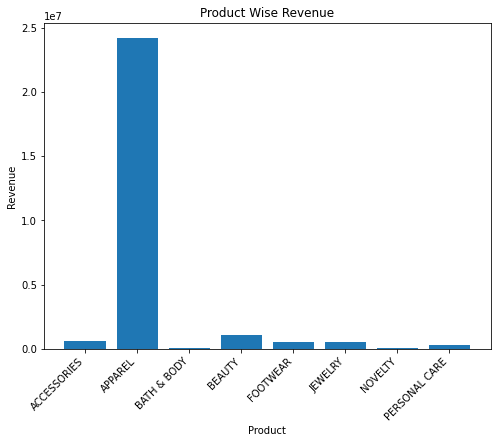

In [41]:
# group the data by Product and sum the Amount column
revenue_by_product = merged_df.groupby('Product')['Revenue'].sum()

# create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(revenue_by_product.index, revenue_by_product.values)
plt.xticks(rotation=45, ha='right')

# add labels and title
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Product Wise Revenue')

# display the plot
plt.show()

In [44]:
merged_df['Channel'].value_counts()

POS Sales    258124
Internet     250534
Name: Channel, dtype: int64

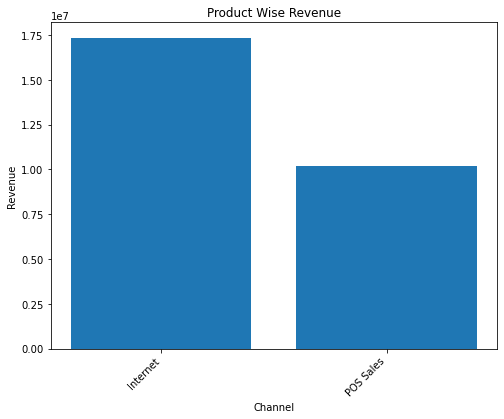

In [42]:
# group the data by channel and sum the Amount column
revenue_by_channel = merged_df.groupby('Channel')['Revenue'].sum()

# create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(revenue_by_channel.index, revenue_by_channel.values)
plt.xticks(rotation=45, ha='right')

# add labels and title
plt.xlabel('Channel')
plt.ylabel('Revenue')
plt.title('Channel Wise Revenue')

# display the plot
plt.show()

In [45]:
merged_df['Mail Deliverable'].value_counts()

1    502401
0      6257
Name: Mail Deliverable, dtype: int64

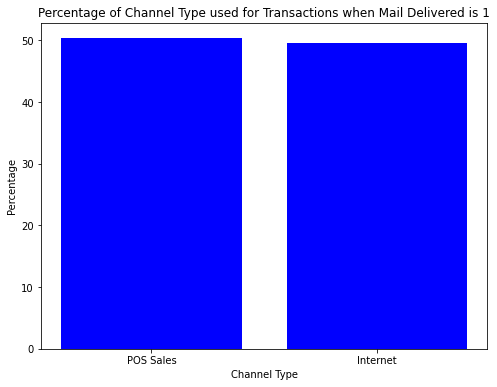

In [48]:
mail_delivered_1 = merged_df[merged_df['Mail Deliverable'] == 1]
channel_type = mail_delivered_1['Channel'].value_counts(normalize=True) * 100

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(channel_type.index, channel_type.values, color='blue')
ax.set_xlabel('Channel Type')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Channel Type used for Transactions when Mail Delivered is 1')
plt.show()

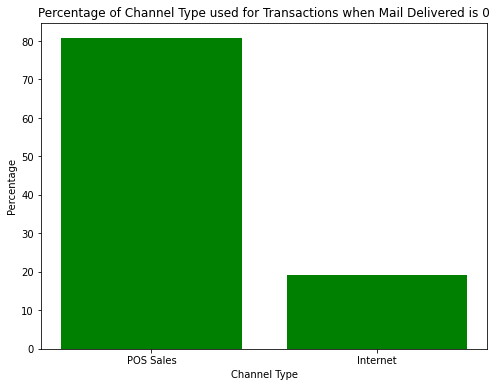

In [50]:
mail_delivered_0 = merged_df[merged_df['Mail Deliverable'] == 0]
channel_type = mail_delivered_0['Channel'].value_counts(normalize=True) * 100

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(channel_type.index, channel_type.values, color='green')
ax.set_xlabel('Channel Type')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Channel Type used for Transactions when Mail Delivered is 0')
plt.show()

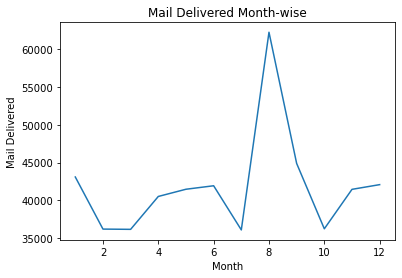

In [40]:
mail_delivered_monthly = merged_df.groupby('Month')['Mail Deliverable'].sum()

# plotting the data
plt.plot(mail_delivered_monthly.index, mail_delivered_monthly.values)
plt.xlabel('Month')
plt.ylabel('Mail Delivered')
plt.title('Mail Delivered Month-wise')
plt.show()

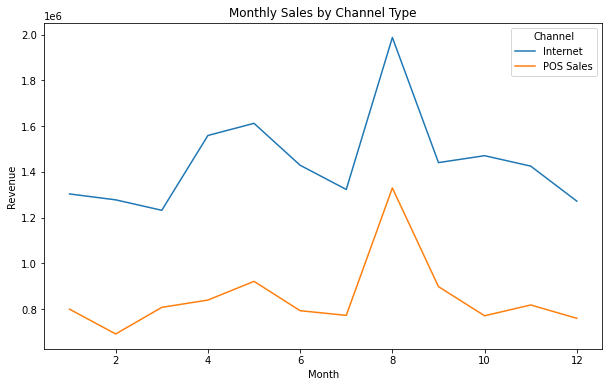

In [52]:
# create a pivot table to aggregate monthly sales by channel type
monthly_sales_by_channel = pd.pivot_table(merged_df, values='Revenue', index='Month', columns='Channel', aggfunc='sum')

# create a line plot to visualize the monthly sales by channel type
monthly_sales_by_channel.plot(kind='line', figsize=(10, 6))

# set plot title and labels
plt.title('Monthly Sales by Channel Type')
plt.xlabel('Month')
plt.ylabel('Revenue')

# show the plot
plt.show()

### Questions

#### Q1. Aggregate the revenue and quantity at customer level for relevant time period along with the reason of time period selection

To aggregate revenue and quantity at the customer level, we need to first identify the relevant time period for analysis

1.Monthly: Aggregating the data at the monthly level can provide insights into trends over time and seasonal variations.

2.Quarterly: Aggregating the data at the quarterly level can provide a higher-level view of performance and may be useful for reporting purposes.

In [53]:
monthly_df = merged_df.groupby(['Customer ID', 'Month']).agg({'Revenue': 'sum','Quantity': 'sum'}).reset_index()

In [54]:
monthly_df.head()

,Customer ID,Month,Revenue,Quantity
0,1806560,9,234.84,7
1,1806593,1,278.85,3
2,1806727,1,108.95,1
3,1806727,4,508.70,6
4,1806727,10,79.95,1


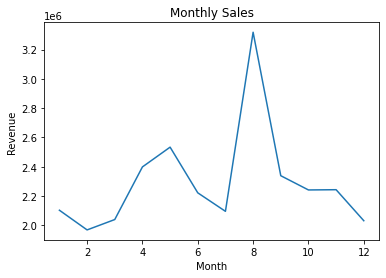

In [55]:
import matplotlib.pyplot as plt

# Group the data by Month and calculate the sum of Amount
monthly_amount = monthly_df.groupby('Month')['Revenue'].sum()

# Create a line chart using Matplotlib
plt.plot(monthly_amount.index, monthly_amount.values)

# Set the chart title and axis labels
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Revenue')

# Show the plot
plt.show()


In [56]:
quarterly_df = merged_df.groupby(['Customer ID', 'Quarter']).agg({'Revenue': 'sum','Quantity': 'sum'}).reset_index()

In [57]:
quarterly_df.head()

,Customer ID,Quarter,Revenue,Quantity
0,1806560,3,234.84,7
1,1806593,1,278.85,3
2,1806727,1,108.95,1
3,1806727,2,508.70,6
4,1806727,4,79.95,1


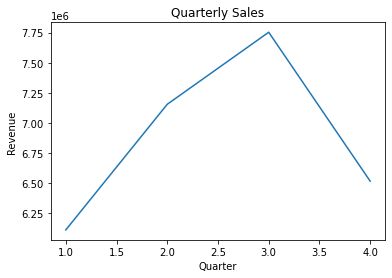

In [58]:
# Group the data by Quarter and calculate the sum of Amount
quarterly_amount = quarterly_df.groupby('Quarter')['Revenue'].sum()

# Create a line chart using Matplotlib
plt.plot(quarterly_amount.index, quarterly_amount.values)

# Set the chart title and axis labels
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Revenue')

# Show the plot
plt.show()


In [59]:
avg_order_value_per_customer = merged_df.groupby(['Customer ID']).agg({'Revenue': 'mean'}).reset_index()
avg_order_value_per_customer.head()

,Customer ID,Revenue
0,1806560,33.548571
1,1806593,92.950000
2,1806727,87.200000
3,1806735,88.925000
4,1806741,41.200000


In [60]:
# compute the max date
max_date = max(merged_df['Date'])
max_date

Timestamp('2019-12-31 00:00:00')

In [61]:
# compute the diff
merged_df['diff'] = max_date - merged_df['Date']
merged_df.head()

,Customer ID,Mail Deliverable,Lifetime Recency,Lifetime Frequency,Lifetime Monetary,Closest store distance,Date,Product,Cost,Channel,Store,Month,Quarter,Year,Quantity,Revenue,diff
0,4482047,1,15,2,118.90,8.0,2019-07-06,APPAREL,23.00,Internet,999,7,3,2019,1,108.95,178 days
1,6564872,1,4,6,1785.20,13.0,2019-12-13,APPAREL,16.31,Internet,999,12,4,2019,1,69.95,18 days
2,7004515,1,11,23,2068.93,23.0,2019-11-21,APPAREL,39.75,Internet,999,11,4,2019,1,119.95,40 days
3,7004515,1,11,23,2068.93,23.0,2019-07-20,APPAREL,14.75,Internet,999,7,3,2019,1,59.95,164 days
4,6429944,1,11,8,2813.77,9.0,2019-12-11,APPAREL,15.76,Internet,999,12,4,2019,1,79.95,20 days


In [62]:
# monetary
grouped_df = merged_df.groupby('Customer ID')['Lifetime Monetary'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,Customer ID,Lifetime Monetary
0,1806560,27763.19
1,1806593,4314.69
2,1806727,16492.96
3,1806735,1822.02
4,1806741,11842.16


In [63]:
merged_df.columns

Index(['Customer ID', 'Mail Deliverable', 'Lifetime Recency',
       'Lifetime Frequency ', 'Lifetime Monetary', 'Closest store distance',
       'Date', 'Product', 'Cost', 'Channel', 'Store', 'Month', 'Quarter',
       'Year', 'Quantity', 'Revenue', 'diff'],
      dtype='object')

In [64]:
# frequency
frequency = merged_df.groupby('Customer ID')['Lifetime Frequency '].count()
frequency = frequency.reset_index()
frequency.columns = ['Customer ID', 'Lifetime Frequency ']
frequency.head()

,Customer ID,Lifetime Frequency
0,1806560,7
1,1806593,3
2,1806727,8
3,1806735,2
4,1806741,4


In [65]:
# merge the two dfs
grouped_df = pd.merge(grouped_df, frequency, on='Customer ID', how='inner')
grouped_df.head()

,Customer ID,Lifetime Monetary,Lifetime Frequency
0,1806560,27763.19,7
1,1806593,4314.69,3
2,1806727,16492.96,8
3,1806735,1822.02,2
4,1806741,11842.16,4


In [66]:
recency = merged_df.groupby('Customer ID')['Lifetime Recency'].min()
recency = recency.reset_index()
recency.columns = ['Customer ID', 'Lifetime Recency']
recency.head()

,Customer ID,Lifetime Recency
0,1806560,2
1,1806593,3
2,1806727,1
3,1806735,1
4,1806741,18


In [67]:
grouped_df = pd.merge(grouped_df, recency, on='Customer ID', how='inner')
grouped_df.head()

,Customer ID,Lifetime Monetary,Lifetime Frequency,Lifetime Recency
0,1806560,27763.19,7,2
1,1806593,4314.69,3,3
2,1806727,16492.96,8,1
3,1806735,1822.02,2,1
4,1806741,11842.16,4,18


{'whiskers': [<matplotlib.lines.Line2D at 0x25bdbb74910>,
 'caps': [<matplotlib.lines.Line2D at 0x25bdbb74250>,
 'boxes': [<matplotlib.lines.Line2D at 0x25bdbb74640>],
 'medians': [<matplotlib.lines.Line2D at 0x25bdbb493d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25bdbb49070>],
 'means': []}

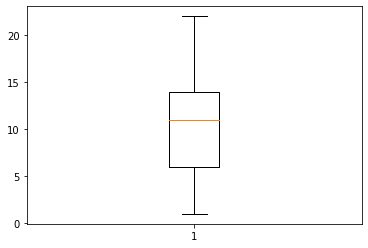

In [68]:
plt.boxplot(grouped_df['Lifetime Recency'])

In [69]:
grouped_df.columns

Index(['Customer ID', 'Lifetime Monetary', 'Lifetime Frequency ',
       'Lifetime Recency'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x25bdbadefd0>,
 'caps': [<matplotlib.lines.Line2D at 0x25bdbade850>,
 'boxes': [<matplotlib.lines.Line2D at 0x25bdbaded30>],
 'medians': [<matplotlib.lines.Line2D at 0x25bdbb0e100>],
 'fliers': [<matplotlib.lines.Line2D at 0x25bdbb0e0a0>],
 'means': []}

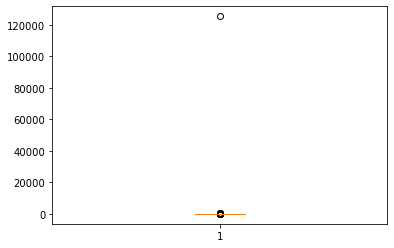

In [70]:
plt.boxplot(grouped_df['Lifetime Frequency '])

{'whiskers': [<matplotlib.lines.Line2D at 0x25bdb5ae580>,
 'caps': [<matplotlib.lines.Line2D at 0x25bdb5a38b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25bdb5aea30>],
 'medians': [<matplotlib.lines.Line2D at 0x25bdb5a3a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x25bdb5a3370>],
 'means': []}

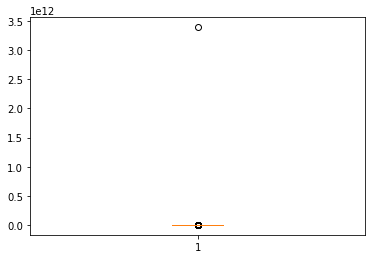

In [71]:
plt.boxplot(grouped_df['Lifetime Monetary'])

In [72]:
grouped_df['Lifetime Monetary'].max()

3394273471340.0625

In [73]:
grouped_df.head()

,Customer ID,Lifetime Monetary,Lifetime Frequency,Lifetime Recency
0,1806560,27763.19,7,2
1,1806593,4314.69,3,3
2,1806727,16492.96,8,1
3,1806735,1822.02,2,1
4,1806741,11842.16,4,18


In [74]:
grouped_df = grouped_df.rename(columns={'Lifetime Monetary': 'Lifetime_Monetary','Lifetime Frequency ':'Lifetime_Frequency','Lifetime Recency':'Lifetime_Recency'})
grouped_df.shape

(86665, 4)

In [75]:
grouped_df.describe()

,Customer ID,Lifetime_Monetary,Lifetime_Frequency,Lifetime_Recency
count,8.666500e+04,8.666500e+04,86665.000000,86665.000000
mean,8.414057e+06,3.919061e+07,5.869244,10.038066
std,5.319762e+06,1.152988e+10,426.248169,5.477223
min,1.806560e+06,1.040000e+00,1.000000,1.000000
25%,3.927253e+06,7.553200e+02,1.000000,6.000000
50%,7.721348e+06,3.062460e+03,2.000000,11.000000
75%,9.534395e+06,1.206068e+04,5.000000,14.000000
max,1.809589e+07,3.394273e+12,125473.000000,22.000000


### Outlier treatment

In [76]:
from scipy import stats

# Calculate z-scores for each column
z_scores = stats.zscore(grouped_df[['Lifetime_Frequency', 'Lifetime_Monetary']])

# Find rows where z-score > 3 or z-score < -3
outliers = (np.abs(z_scores) > 3).any(axis=1)

# Remove rows where outliers are found
grouped_df = grouped_df[~outliers]


In [77]:
Frequency = grouped_df['Lifetime_Frequency']
log_frequecy = np.log(Frequency)

# replace the original column with the transformed column
grouped_df['Lifetime_Frequency'] = log_frequecy


In [78]:
#Recency = grouped_df['Lifetime_Recency']
#log_recency = np.log(Recency)
#grouped_df['Lifetime_Recency'] = log_recency

In [79]:
grouped_df.describe()

,Customer ID,Lifetime_Monetary,Lifetime_Frequency,Lifetime_Recency
count,8.666400e+04,8.666400e+04,86664.000000,86664.000000
mean,8.414078e+06,2.516653e+04,1.012827,10.038170
std,5.319790e+06,2.077434e+05,0.898730,5.477168
min,1.806560e+06,1.040000e+00,0.000000,1.000000
25%,3.927246e+06,7.553175e+02,0.000000,6.000000
50%,7.721412e+06,3.062315e+03,0.693147,11.000000
75%,9.534429e+06,1.206062e+04,1.609438,14.000000
max,1.809589e+07,3.946852e+07,5.717028,22.000000


In [80]:
# removing (statistical) outliers
#Q1 = grouped_df.Lifetime_Monetary.quantile(0.25)
#Q3 = grouped_df.Lifetime_Monetary.quantile(0.75)
#IQR = Q3 - Q1
#grouped_df = grouped_df[(grouped_df.Lifetime_Monetary >= Q1 - 1.5*IQR) & (grouped_df.Lifetime_Monetary <= Q3 + 1.5*IQR)]


In [81]:
# outlier treatment for recency
#Q1 = grouped_df.Lifetime_Recency.quantile(0.25)
#Q3 = grouped_df.Lifetime_Recency.quantile(0.75)
#IQR = Q3 - Q1
#grouped_df = grouped_df[(grouped_df.Lifetime_Recency >= Q1 - 1.5*IQR) & (grouped_df.Lifetime_Recency <= Q3 + 1.5*IQR)]


In [82]:
# outlier treatment for frequency
#Q1 = grouped_df.Lifetime_Frequency.quantile(0.25)
#Q3 = grouped_df.Lifetime_Frequency.quantile(0.75)
#IQR = Q3 - Q1
#grouped_df = grouped_df[(grouped_df.Lifetime_Frequency >= Q1 - 1.5*IQR) & (grouped_df.Lifetime_Frequency <= Q3 + 1.5*IQR)]


In [83]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [84]:
# rescaling
rfm_df = grouped_df[['Lifetime_Monetary', 'Lifetime_Frequency', 'Lifetime_Recency']]

# instantiate
scaler = StandardScaler()
# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(86664, 3)

In [85]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary','Frequency','Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,0.012499,1.038231,-1.467586
1,-0.100374,0.095453,-1.285009
2,-0.041752,1.186810,-1.650163
3,-0.112373,-0.355703,-1.650163
4,-0.064139,0.415553,1.453648


### Modelling

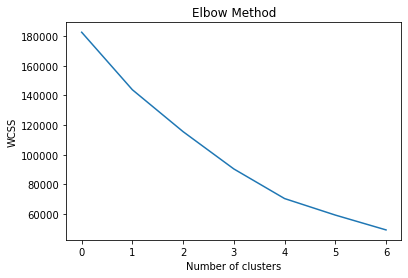

In [86]:
#elbow curve

ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(ssd)

### Silhouette analysis

In [75]:
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters,init='k-means++', max_iter=200, n_init=10, random_state=0)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(rfm_df_scaled,cluster_labels)
    
    print("form n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))

form n_clusters=2, the silhouette score is 0.3937948010257699
form n_clusters=3, the silhouette score is 0.3929560264855427
form n_clusters=4, the silhouette score is 0.3611711287469935
form n_clusters=5, the silhouette score is 0.34671059428169576
form n_clusters=6, the silhouette score is 0.3825946752513651
form n_clusters=7, the silhouette score is 0.38636581763976924
form n_clusters=8, the silhouette score is 0.3835622491484164


In [87]:
# final model with k = 4

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(rfm_df_scaled)

In [88]:
kmeans.labels_

array([1, 2, 1, ..., 0, 0, 0])

In [89]:
#assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,Customer ID,Lifetime_Monetary,Lifetime_Frequency,Lifetime_Recency,cluster_id
0,1806560,27763.19,1.945910,2,1
1,1806593,4314.69,1.098612,3,2
2,1806727,16492.96,2.079442,1,1
3,1806735,1822.02,0.693147,1,2
4,1806741,11842.16,1.386294,18,0


In [92]:
grouped_df.columns

Index(['Customer ID', 'Lifetime_Monetary', 'Lifetime_Frequency',
       'Lifetime_Recency', 'cluster_id'],
      dtype='object')

In [93]:
grouped_df.shape

(86664, 5)

In [90]:
cluster_counts = grouped_df['cluster_id'].value_counts()
print(cluster_counts)

0    44725
2    21383
1    20555
3        1
Name: cluster_id, dtype: int64


### Cluster Analysis

In [94]:
merged_df.head()

,Customer ID,Mail Deliverable,Lifetime Recency,Lifetime Frequency,Lifetime Monetary,Closest store distance,Date,Product,Cost,Channel,Store,Month,Quarter,Year,Quantity,Revenue,diff
0,4482047,1,15,2,118.90,8.0,2019-07-06,APPAREL,23.00,Internet,999,7,3,2019,1,108.95,178 days
1,6564872,1,4,6,1785.20,13.0,2019-12-13,APPAREL,16.31,Internet,999,12,4,2019,1,69.95,18 days
2,7004515,1,11,23,2068.93,23.0,2019-11-21,APPAREL,39.75,Internet,999,11,4,2019,1,119.95,40 days
3,7004515,1,11,23,2068.93,23.0,2019-07-20,APPAREL,14.75,Internet,999,7,3,2019,1,59.95,164 days
4,6429944,1,11,8,2813.77,9.0,2019-12-11,APPAREL,15.76,Internet,999,12,4,2019,1,79.95,20 days


In [97]:
merged_cluster_df = pd.merge(merged_df, grouped_df, on='Customer ID', how='inner')

# drop duplicate rows if any
merged_df.drop_duplicates()

,Customer ID,Mail Deliverable,Lifetime Recency,Lifetime Frequency,Lifetime Monetary,Closest store distance,Date,Product,Units,Amount,Cost,Channel,Store
0,4482047,Y,15,2,118.90,8.0,07/06/2019,APPAREL,1,108.95,23.00,Internet,999
1,6564872,Y,4,6,1785.20,13.0,13/12/2019,APPAREL,1,69.95,16.31,Internet,999
2,7004515,Y,11,23,2068.93,23.0,21/11/2019,APPAREL,1,119.95,39.75,Internet,999
3,7004515,Y,11,23,2068.93,23.0,20/07/2019,APPAREL,1,59.95,14.75,Internet,999
4,6429944,Y,11,8,2813.77,9.0,12/11/2019,APPAREL,1,79.95,15.76,Internet,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508653,2930907,Y,18,1,99.90,175.0,20/04/2019,APPAREL,1,76.46,13.80,Internet,999
508654,18077839,Y,13,2,229.86,24.0,31/08/2019,APPAREL,1,39.99,27.25,Internet,999
508655,18077839,Y,13,2,229.86,24.0,31/08/2019,APPAREL,1,49.99,21.00,Internet,999
508656,18077839,Y,13,2,229.86,24.0,31/08/2019,APPAREL,1,59.99,20.16,Internet,999


In [98]:
merged_cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383185 entries, 0 to 383184
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer ID             383185 non-null  int64  
 1   Mail Deliverable        383185 non-null  object 
 2   Lifetime Recency        383185 non-null  int64  
 3   Lifetime Frequency      383185 non-null  int64  
 4   Lifetime Monetary       383185 non-null  float64
 5   Closest store distance  383185 non-null  float64
 6   Date                    383185 non-null  object 
 7   Product                 383185 non-null  object 
 8   Units                   383185 non-null  int64  
 9   Amount                  383182 non-null  float64
 10  Cost                    383185 non-null  float64
 11  Channel                 383185 non-null  object 
 12  Store                   383185 non-null  int32  
 13  Lifetime_Monetary       383185 non-null  float64
 14  Lifetime_Frequency  

### Cluster wise statistics

In [105]:
# group the data by cluster_id and calculate the mean, median, and standard deviation for each variable
grouped_cluster = grouped_df.groupby('cluster_id').agg({'Lifetime_Monetary': ['mean'],'Lifetime_Recency': ['mean'],'Lifetime_Frequency': ['mean']})

# flatten the column names to make it easier to work with
grouped_cluster.columns = ['_'.join(col).strip() for col in grouped_cluster.columns.values]

# display the result
print(grouped_cluster)


            Lifetime_Monetary_mean  Lifetime_Recency_mean  \
cluster_id                                                  
0                     4.009924e+03              14.231392   
1                     9.008451e+04               6.207492   
2                     5.169188e+03               4.950334   
3                     3.946852e+07               1.000000   

            Lifetime_Frequency_mean  
cluster_id                           
0                          0.631713  
1                          2.248559  
2                          0.621869  
3                          5.683580  


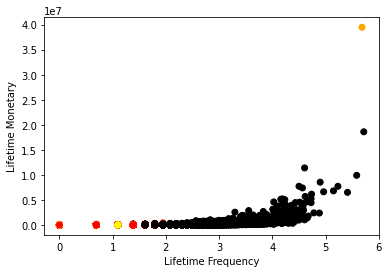

In [106]:
import matplotlib.pyplot as plt

# Create a dictionary of color codes for each cluster
color_dict = {0: 'red', 1: 'black', 2: 'yellow',3:'orange'}

# Plot the scatter plot with color-coded clusters
plt.scatter(grouped_df['Lifetime_Frequency'], grouped_df['Lifetime_Monetary'], c=grouped_df['cluster_id'].apply(lambda x: color_dict[x]))

# Add axis labels and title
plt.xlabel('Lifetime Frequency')
plt.ylabel('Lifetime Monetary')

# Show the plot
plt.show()


<AxesSubplot:xlabel='cluster_id', ylabel='Lifetime_Monetary'>

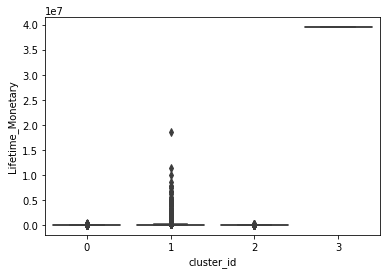

In [107]:
#plot
sns.boxplot(x = 'cluster_id',y = 'Lifetime_Monetary',data = grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='Lifetime_Frequency'>

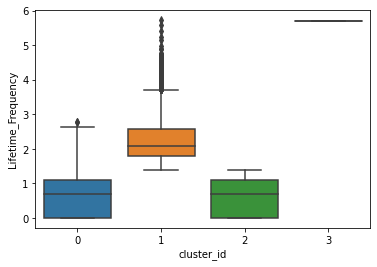

In [108]:
sns.boxplot(x = 'cluster_id',y = 'Lifetime_Frequency',data = grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='Lifetime_Recency'>

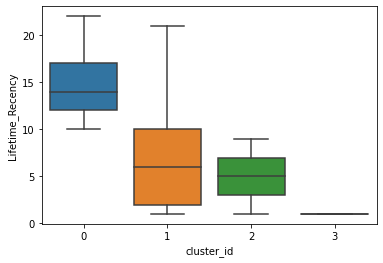

In [109]:
sns.boxplot(x = 'cluster_id',y = 'Lifetime_Recency',data = grouped_df)

### Hierarchical Clustering

In [189]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [190]:
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,0.012499,0.401010,-1.467586
1,-0.100374,-0.221073,-1.285009
2,-0.041752,0.556531,-1.650163
3,-0.112373,-0.376594,-1.650163
4,-0.064139,-0.065552,1.453648


In [191]:
# perform hierarchical clustering using linkage function 
Z = linkage(rfm_df_scaled, method='ward')

MemoryError: unable to allocate array data.

In [ ]:
# plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
#single linkage
#mergings = linkage(rfm_df_scaled,method="single",metric='euclidean')
#dendrogram(mergings)
#plt.show()

In [ ]:
#complete linkage
#mergings = linkage(rfm_df_scaled,method="complete",metric='euclidean')
#dendrogram(mergings)
#plt.show()

In [ ]:
#3 clusters
cluster_labels = cut_tree(mergings,n_clusters = 3).reshape(-1, )
cluster_labels

In [ ]:
# assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

In [ ]:
sns.boxplot(x='cluster_labels',y='Lifetime_Recency',data=grouped_df)

In [ ]:
sns.boxplot(x='cluster_labels',y='Lifetime_Frequency',data=grouped_df)